<a href="https://colab.research.google.com/github/dougfeltrim/Bootcamp_Data_Science_Aplicada/blob/main/Bootcamp_Data_Science_Aplicada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd

In [37]:
dados = pd.read_csv("/content/A182510189_28_143_208.csv", encoding="utf-8", skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",")
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,996411254.68
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,450048530.47
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13534657.88,19698748.89,21129394.43,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1917247936.05
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84,2860584.22,2740088.01,2689103.41,2985029.23,2771881.20,2938769.3

In [38]:
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Dez     53377763.15
2021/Jan     56073748.02
2021/Fev     55578233.31
2021/Mar     62502301.42
Total      6388213338.48
Length: 159, dtype: float64

In [39]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 161 entries, Unidade da Federação to Total
dtypes: float64(159), object(2)
memory usage: 34.1+ KB


In [40]:
pd.options.display.float_format = "{:.2f}".format

In [41]:
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Dez     53377763.15
2021/Jan     56073748.02
2021/Fev     55578233.31
2021/Mar     62502301.42
Total      6388213338.48
Length: 159, dtype: float64

In [42]:
dados['2008/Ago'].mean()

27800320.306666665

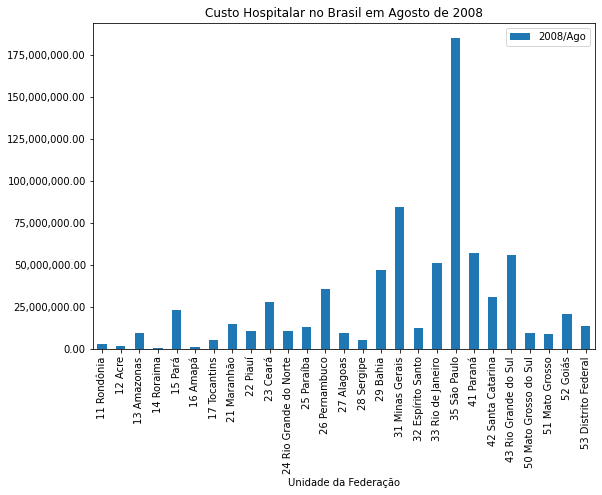

In [105]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados.plot(x='Unidade da Federação' , y='2008/Ago', kind='bar', figsize=(9,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title("Custo Hospitalar no Brasil em Agosto de 2008")

plt.show() 

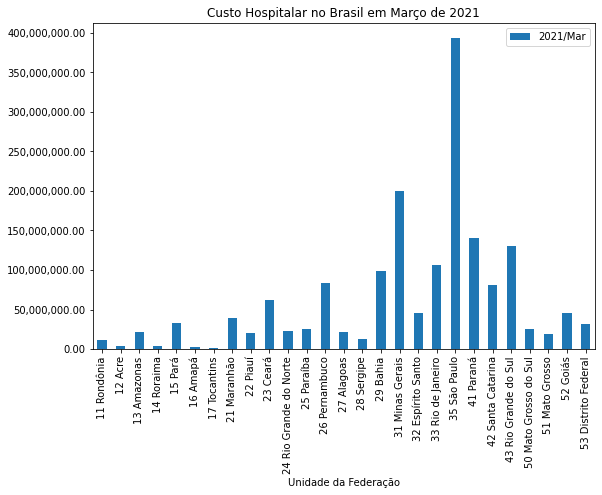

In [104]:
ax = dados.plot(x='Unidade da Federação' , y='2021/Mar', kind='bar', figsize=(9,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title("Custo Hospitalar no Brasil em Março de 2021")

plt.show() 



In [103]:
diferenca = dados['2021/Mar'].mean() - dados['2008/Ago'].mean()
print('%.2f' %  diferenca)

34701981.11
